# Análisis de Datos

### Análisis Bivariado

In [20]:
import os
import pandas as pd
import numpy as np

In [55]:
# Cargamos base de Salarios
dire=os.getcwd()
autos=pd.read_csv(dire+"\\auto.csv", sep=',',
                  dtype={'cilindros': np.str_, 'anio': np.str_,
                         'origin': np.str_}
                 )

Ahora, vamos a reemplazar los valores exraños de la variables cabalos **?** por NA y despues los vamos a sustituir por la media

In [57]:
media_c=autos.replace({'caballos':{'?': np.nan}}
                     ).dropna(axis=0,how='any'
                             )['caballos'].astype('int').mean()
media_c

104.46938775510205

In [58]:
autos.replace({'caballos': {'?': media_c}}, inplace=True)

Ahora que nuestras variables ya no tienen valores extraños, vamos a proceder a relizar una regresión, por lo cual es necesario definir una variable objetivo y unas variables predictoras

**Variables Objetivo:** mpg
    
**Vairbales Predictoras:** cilindros, desplazamiento, caballos, peso, aceleracion, origin

In [59]:
lista=range(1,201)
pares=[]
for i in lista:
    if i%2==0:
        pares.append(i)


In [60]:
 dict(autos.dtypes)

{'mpg': dtype('float64'),
 'cilindros': dtype('O'),
 'desplazamiento': dtype('float64'),
 'caballos': dtype('O'),
 'peso': dtype('int64'),
 'aceleracion': dtype('float64'),
 'anio': dtype('O'),
 'origin': dtype('O'),
 'nombre': dtype('O')}

In [63]:
var_cat=[llave for llave in dict(autos.dtypes) if dict(autos.dtypes)[llave]=='O' and 
         llave not in ['anio','nombre','caballos'] ]

var_cat

['cilindros', 'origin']

In [77]:
var_num= [llave for llave in dict(autos.dtypes) if dict(autos.dtypes)[llave]!='O' and 
          llave!='mpg']
var_num.append('caballos')
var_num

['desplazamiento', 'peso', 'aceleracion', 'caballos']

Instalacion de librerias que nos ayudaran a graficar

In [68]:
#!! pip install seaborn y upgrade
!! pip install --upgrade seaborn

['Requirement already satisfied: seaborn in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (0.11.2)',
 'Requirement already satisfied: pandas>=0.23 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from seaborn) (1.3.4)',
 'Requirement already satisfied: matplotlib>=2.2 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from seaborn) (3.4.3)',
 'Requirement already satisfied: scipy>=1.0 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from seaborn) (1.7.1)',
 'Requirement already satisfied: numpy>=1.15 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from seaborn) (1.20.3)',
 'Requirement already satisfied: kiwisolver>=1.0.1 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from matplotlib>=2.2->seaborn) (1.3.1)',
 'Requirement already satisfied: cycler>=0.10 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from matplotlib>=2.2->seaborn) (0.10.0)',
 'Requirement already satisfied: python-dateutil>=2.7 in c:\\users\\lenovo\\anaconda3\\lib\\site-packages (from matpl

In [69]:
# Importar seabron y matplotlib
import seaborn as sns  
import matplotlib.pyplot as plt
sns.set()

### Grafico de Rendijas

Ahora vamos a introducir la siguiente función:
    
sns.pairplot(dr,height,diag_kind,kind,markers)

- **df:** Dataframe generalmente con variables numéricas  
- **height:** Tamaño del gráfico  
- **diag_kind:** Tipo de gráfico en la diagonal {kde, hist}  
- **kind:** Tipo de gráfico fuera de la diagonal {scatter, reg} 
- **markers:** Marcadores para los "gráficos de puntos"  
    
[Marcadores de Matplotlib](https://matplotlib.org/api/markers_api.html)

In [78]:
var_num.append('mpg')
var_num

['desplazamiento', 'peso', 'aceleracion', 'caballos', 'mpg']

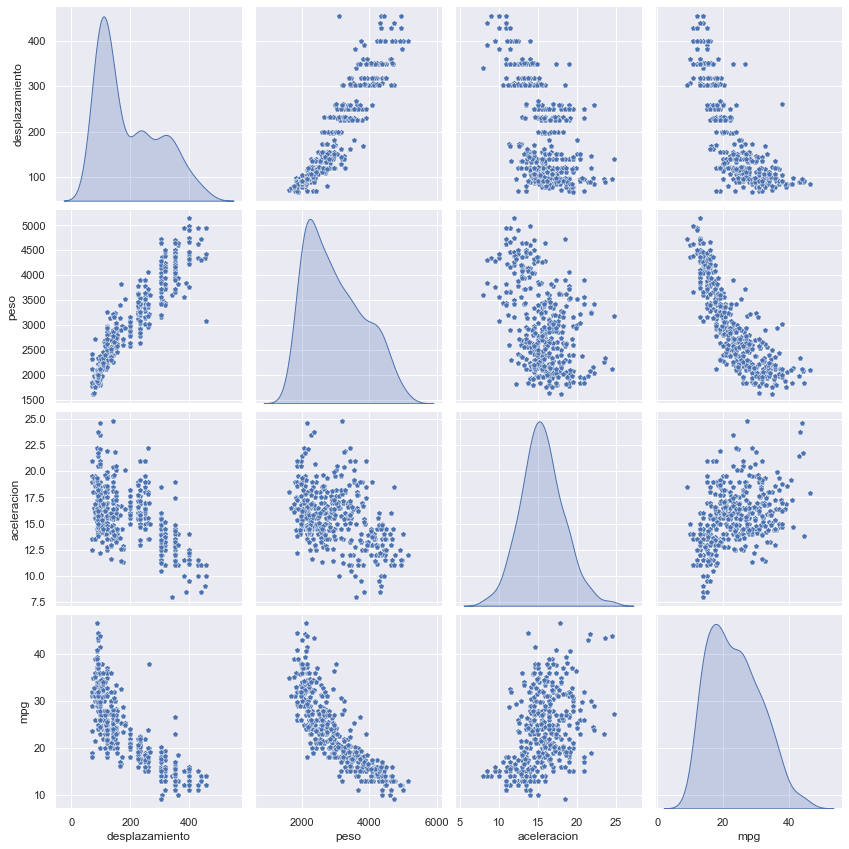

In [79]:
sns.pairplot(autos[var_num], height=3, diag_kind= 'kde', kind='scatter', 
             markers='p')
plt.show()

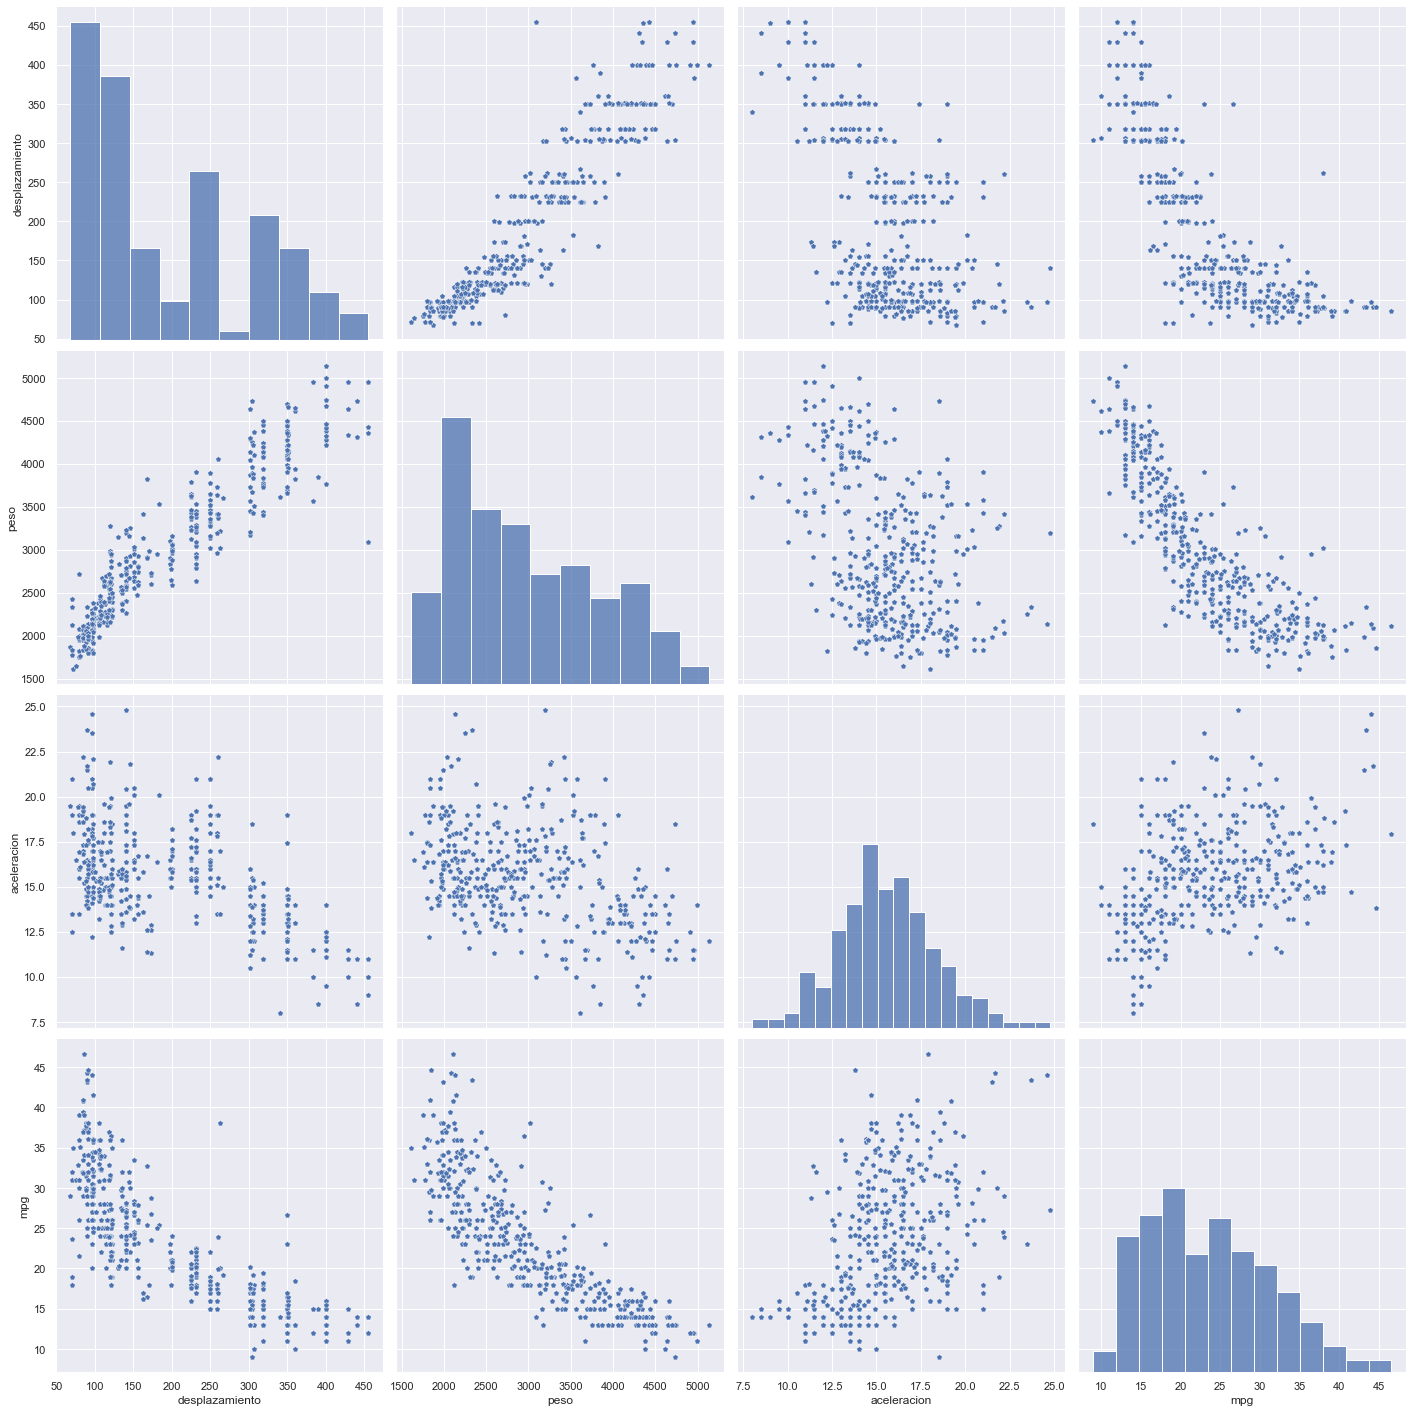

In [80]:
sns.pairplot(autos[var_num], height=5, diag_kind= 'hist', kind='scatter', 
             markers='p')
plt.show()

In [81]:
var_num.pop()
var_num

['desplazamiento', 'peso', 'aceleracion', 'caballos']

### Análisis Bivariados: V. Numerica vs V. Numerica

**Coeficiente de correlación de Pearson:** Es el indice que se usa para medir el grado de relación lineal entre dos variables numericas continuas. Este se mueve entre -1 y 1, donde:

- **[-1,0)** significa una **correlación negativa** es decir quecuando una variable crece la otra disminuye

- **0** significa **correlación nula** es decir que no hay ninguan relación entre las variables
   
- **(0,1]** signfiica **correlación positiva** es decir que cuando una variable aumenta la otra tambien lo hara.y
           

### Gráfico de puntos

Ahora, vamos a introducir la siguiente función: 

sns.scatterplot(x, y, hue, data)

- **x:** Variable numérica  

- **y:** Variable numérica  

- **hue:** Variable categórica para colorear de acuerdo a las clases  

- **data:** Dataframe de las variables 

Vamos a comprobar si existe una relación entre la variable objetivo (mpg) y la variable predictora "desplazamiento"

In [84]:
# Coeficiente de correlación de Pearson con Python

autos[ ['mpg','desplazamiento'] ].corr()

,mpg,desplazamiento
mpg,1.000000,-0.804203
desplazamiento,-0.804203,1.000000


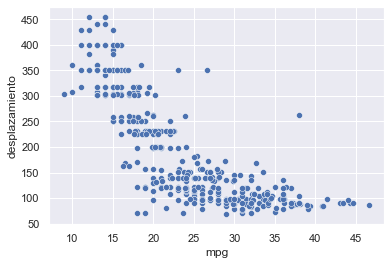

In [86]:
sns.scatterplot(x='mpg',y='desplazamiento',data=autos)
plt.show()

### Análisis Bivariados: V. Numerica vs V. Categorica

In [88]:
# Conteo de valores únicos de variables categoricas

autos['cilindros'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cilindros, dtype: int64

### Cambiar Grupos de una Variable

Ahora,va mos a utilizar la siguiente función: 

df.replace({ 'variable' : { 'val1' : 'nuevo1', 'val2' : 'nuevo2', 'val3' : 'nuevo3'}}, Inplace)  

- **variable:** Variable categorica del data frame  

- **val:** Valor de la variable a reemplazar  

- **nuevo:** Valor nuevo  

- **Inplace:** True para reemplazar los valores en el df original, False para generar uno nuevo

In [90]:
print( autos.cilindros.value_counts() )

4    204
8    103
6     84
3      4
5      3
Name: cilindros, dtype: int64


In [92]:
# Vamos a agregar los conteos de 3 y 5 cilindros al conteo de 5 y 6
# cilindros respectivamente

autos.replace({'cilindros': {'3':'4',
                            '5':'6'}}, inplace=True)
autos.cilindros.value_counts()

4    208
8    103
6     87
Name: cilindros, dtype: int64

### Comparación de Distribuciones

In [100]:
## Creamos un resumen estadístico de mpg para cada tipo de cilindro  
cil= autos.groupby('cilindros')['mpg']
cil.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
cilindros,,,,,,,,
4,208.0,29.12,5.79,18.0,25.0,28.0,32.92,46.6
6,87.0,20.24,4.17,15.0,18.0,19.1,21.00,38.0
8,103.0,14.96,2.84,9.0,13.0,14.0,16.00,26.6


### Gráfico de Distribuciones

Ahora usaremos la siguiente funcion de la libreria matplotlib:
    
sns.distplot(df, label, bins, color)

- **df:** Dataframe con los datos a graficar  
- **label:** Etiqueta del gráfico  
- **bins:** Número de segmentos(barras)
- **color:** Color del gráfico

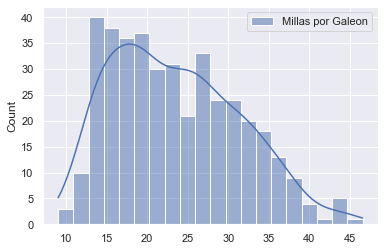

In [110]:
sns.histplot(autos[['mpg']], kde=True,color='blue', label='Millas por Galeon', bins=20)
plt.legend()                         ## Agregar cuadro con leyenda
plt.show()

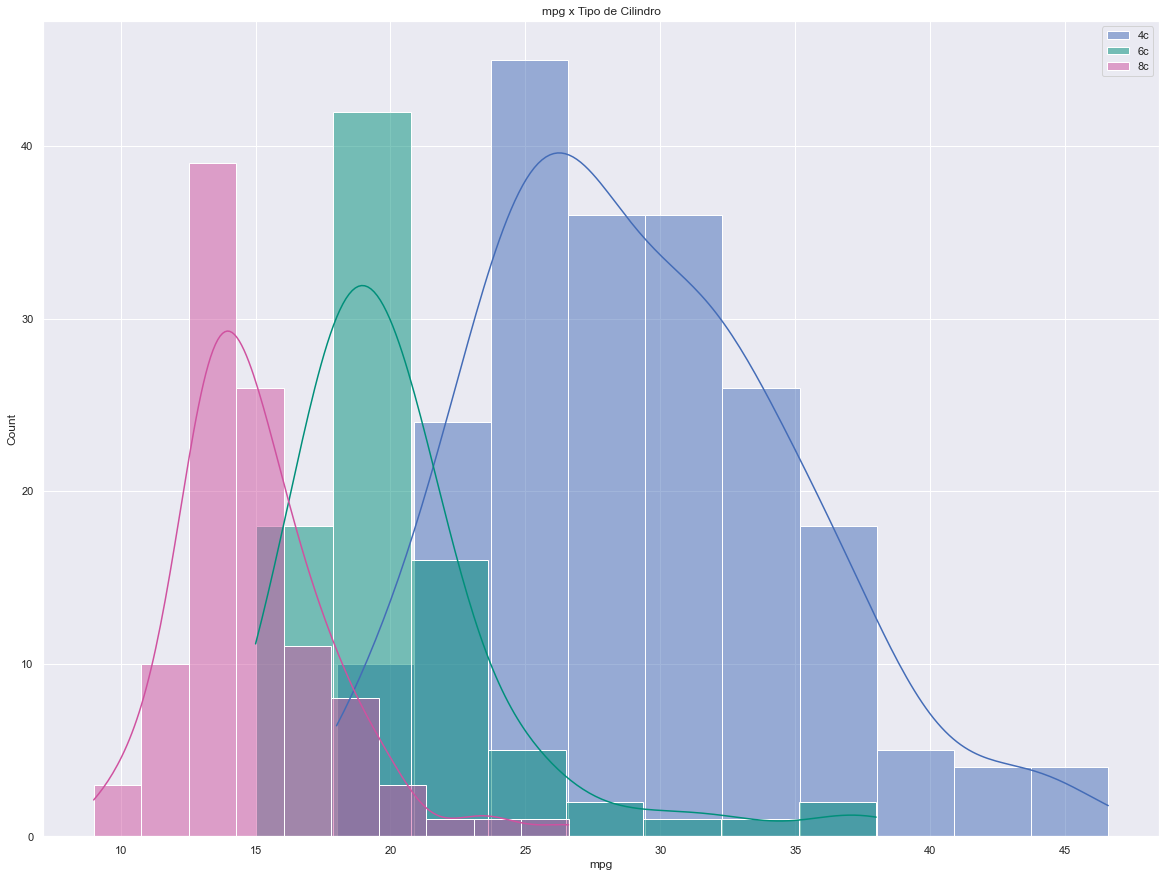

In [116]:
plt.figure( figsize=(20,15) )           ## Tamaño de gráfico
sns.histplot(autos[ autos.cilindros=='4' ]['mpg'], kde=True, color= '#446CB7', label= '4c', bins=10)
sns.histplot(autos[ autos.cilindros=='6' ]['mpg'], kde=True, color= '#008F7A', label= '6c', bins=8)
sns.histplot(autos[ autos.cilindros=='8' ]['mpg'], kde=True, color= '#CF52A0', label= '8c', bins=10)
plt.title("mpg x Tipo de Cilindro")  ## Título del gráfico
plt.legend()                         ## Agregar cuadro con leyenda
plt.show()

In [117]:
### Prueba ANOVA

from statsmodels import api as ap          # Generar prueba anova y modelos estadisticos
from statsmodels.formula.api import ols    # Notación tipo R

***Análisis de varianza***  

$SS_{total}=SS_{fact}+SS_{error}$

$\sum _{i}\sum _{j}(y_{ij}-{\overline {y}})^{2}= n\sum _{i}(\overline y_{i} - {\overline {y}})^{2}+\sum _{i}\sum _{j}(y_{ij}-y_{i})^{2}$

$x_j   \forall j \in 1,..,n $  
$i:$ *i ésima categoría de la variable*

El **ANOVA** mide el porcentaje de varianza explicado por la variable categórica, construye un estadistico con distibución F el cual se contrasta en una prueba de hipótesis donde:

- **H0:** Las medias de los grupos son iguales, lo que indicaría que no hay diferencia entre los grupos. 

- **H1:** Las medias de los grupos no son iguales, lo que indicaría que si hay diferencia entre los grupos. 

Buscamos rechazar H0 por lo que buscaremos un *p-value* bajo. El definir que tan bajo es algo que queda sujeto a el nivel de confianza con el cual quedramos evaluar nuestra prueba, por lo general se usca que el *p-value* sea menor a .05.

In [119]:
model_cil= ols('mpg ~ C(cilindros)', data= autos)        # Generamos un modelo lineal entre mpg y cilindros
model_ajust= model_cil.fit()                             # Ajustamos el modelo
anova_cilindros= ap.stats.anova_lm(model_ajust, typ=2)   # Calculamos el test anova
anova_cilindros

,sum_sq,df,F,PR(>F)
C(cilindros),14997.509601,2.0,320.041822,2.345718e-83
Residual,9255.065876,395.0,NaN,NaN


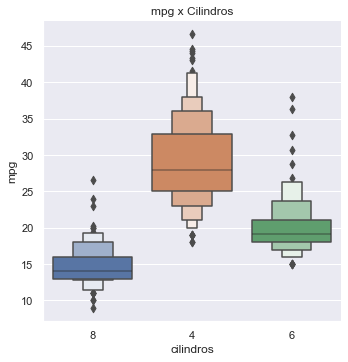

In [125]:
# Comparamos las  distribuciones
sns.catplot(x="cilindros", y="mpg",  kind="bo", data= autos)
# kind='swarm', 'box','bar', 'boxen'
plt.title('mpg x Cilindros')
plt.show()